<a href="https://colab.research.google.com/github/smlra-kjsce/ML-DL101/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM)
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

Lets dissect this line by line. 
First, let us work with linearly separable dataset.

In [0]:
from sklearn import datasets

In [0]:
iris = datasets.load_iris()

In [0]:
x_setosa = iris['data'][:50, (2)]
y_setosa = iris['data'][:50, (3)]
x_versicolor = iris['data'][50:100, (2)]
y_versicolor = iris['data'][50:100, (3)]

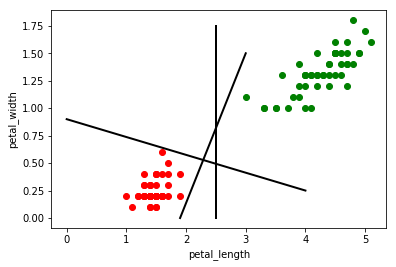

In [0]:
import matplotlib.pyplot as plt

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.plot(x_setosa,y_setosa, 'ro') #plotting setosa flower
plt.plot(x_versicolor,y_versicolor, 'go')  #plotting versicolor flower

plt.plot([2.5,2.5], [0, 1.75], 'k-', lw=2)  #lw: linewidth, k-: line design
plt.plot([0,4], [0.9, 0.25], 'k-', lw=2)
plt.plot([3,1.9], [1.5, 0], 'k-', lw=2)

In [0]:
from sklearn.svm import LinearSVC

X = iris['data'][:100, 2:]
y = iris['target'][:100]

svm_clf = LinearSVC(C=1, loss='hinge')
svm_clf.fit(X,y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [0]:
svm_clf.predict([[5.5,1.7]])

array([1])

# Importance of Feature Scaling
SVM is very sensitive to your data scale. Keep it normalised

In [0]:
canc = datasets.load_breast_cancer()

In [0]:
print(canc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
X = canc['data']
y = canc['target']

In [0]:
from sklearn.model_selection import train_test_split
X_train, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=20)

In [0]:
print(X_train.shape)

(455, 30)


In [0]:
from sklearn.svm import SVC
svc_model = SVC()

In [0]:
svc_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svc_model.predict(Xtest)

from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.5789473684210527

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

model = Pipeline((
("scaler", StandardScaler()),
("svm_clf", SVC())
))
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [0]:
y_pred = model.predict(Xtest)
accuracy_score(y_test,y_pred)

0.9912280701754386

#Kernel Trick
[A video explaining kernel trick in a concise manner.](https://www.youtube.com/watch?v=wBVSbVktLIY)

[For a deeper understanding check out this](https://www.youtube.com/watch?v=ffF8UnbheLk&feature=youtu.be)

Lets visualise Kernel Trick for a dataset.

In [0]:
from sklearn.datasets import make_moons
moon = make_moons(n_samples=100)

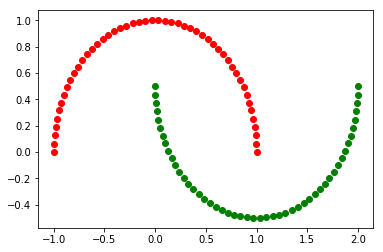

In [0]:
x1, x2, y1, y2 = list(),list(),list(),list()
for i in range(100):
  if moon[1][i]==0:
    x1.append(moon[0][i][0])
    y1.append(moon[0][i][1])
  else:
    x2.append(moon[0][i][0])
    y2.append(moon[0][i][1])
  
plt.plot(x1,y1,'ro')
plt.plot(x2,y2,'go')


In [0]:
from sklearn.svm import SVC
model = SVC() # rbf,gamma,C

X = moon[0]
y = moon[1]

In [0]:
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
model.predict([[0.5, -0.4]])

array([1])

# Gaussian Kernel
<figure>
<center>
<img src='https://drive.google.com/uc?id=1hks8Ev1FqYFoGkep9biiSlKjTzSSyGYU'/>
  </center>
  <figcaption><b></b></figcaption>
</figure>

# Gaussian Radial Basis Function(RBF) Kernel


<figure>
<center>
<img src='https://drive.google.com/uc?id=1KCnVQyBXnfEd7nKBpI32NhavD1KnktvZ'/>
  </center>
  <figcaption><b></b></figcaption>
</figure>


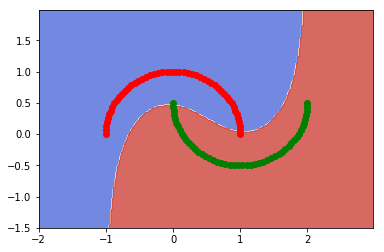

In [0]:
import numpy as np

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
  
fig, ax = plt.subplots()
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)

plt.plot(x1,y1,'ro')
plt.plot(x2,y2,'go')

# Task for Students
1. Look into SVM for Regression Task
2. Explore different Kernel Tricks